# Load and display IGC files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gmplot
import time
import os

In [78]:
import igc
from importlib import reload
reload(igc)

<module 'igc' from '/Users/thomasvuillaume/Work/dataglide/igc.py'>

In [3]:
ls parapente_traces_dataset/

2013-04-07-igcfile-23426-32487.igc    2017-12-28-igcfile-17566-139493.igc
2014-07-08-igcfile-47462-52467.igc    2017-12-28-igcfile-227980-139492.igc
2017-05-16-igcfile-136850-107808.igc  2017-12-28-igcfile-23273-139494.igc
2017-08-12-igcfile-28043-118045.igc   2017-12-30-igcfile-232908-139727.igc
2017-09-24-igcfile-18012-119698.igc   2018-01-01-igcfile-232908-139729.igc
2017-12-25-igcfile-64071-139472.igc   test/
2017-12-28-igcfile-142999-139491.igc


In [4]:
f1 = open("parapente_traces_dataset/2014-07-08-igcfile-47462-52467.igc", "r")

In [68]:
f2 = open("parapente_traces_dataset/2017-09-28-igcfile-96708-124459.igc", "r")

In [69]:
data = f2.read().splitlines()

In [70]:
data[0:15]

['AXSX001 SKYTRAXX V1.64 SN:2507616560',
 'HOPLTPILOT: Julien BURN0D ',
 'HOGTYGLIDERTYPE: ALPINA 2',
 'HOCIDCOMPETITIONID: 0000',
 'HODTM100GPSDATUM: WGS-84',
 'HOCCLCOMPETITION CLASS: EN-C',
 'HPSITSITE: Chalvet, St Andre Les Alpes',
 'HFDTE280917',
 'B1036594358721N00628766EA0136901514',
 'B1037004358718N00628764EA0136901516',
 'B1037014358717N00628762EA0136801516',
 'B1037024358718N00628759EA0136901515',
 'B1037034358720N00628757EA0137101516',
 'B1037044358721N00628754EA0137301518',
 'B1037054358722N00628751EA0137501520']

In [72]:
d40 = igc.read_igc_B(data[40])
d40

{'alt_gps': 1569.0,
 'alt_p': 1422.0,
 'lat': 43.97895,
 'long': 6.479516666666667,
 'time': time.struct_time(tm_year=1900, tm_mon=1, tm_mday=1, tm_hour=10, tm_min=37, tm_sec=31, tm_wday=0, tm_yday=1, tm_isdst=-1)}

In [73]:
d40['alt_p']

1422.0

In [8]:
igc1 = igc.igc_trace()
igc1.read_igc_file("parapente_traces_dataset/2014-07-08-igcfile-47462-52467.igc")

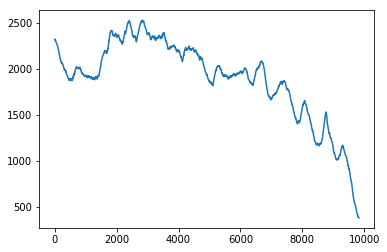

In [9]:
plt.plot(igc1.trace['altitudes_gps'])

## Make one trace with heatmap

In [10]:
start = [igc1.trace['latitudes'][0], igc1.trace['longitudes'][0]]
stop = [igc1.trace['latitudes'][-1], igc1.trace['longitudes'][-1]]

gmap = gmplot.GoogleMapPlotter(start[0], start[1], 16)
gmap.plot(igc1.trace['latitudes'], igc1.trace['longitudes'], 'cornflowerblue', edge_width=3, c='red')
# gmap.scatter(more_lats, more_lngs, '#3B0B39', size=40, marker=False)
gmap.scatter([start[0], stop[0]], [start[-1], stop[-1]], 'k', marker=True)
gmap.heatmap(igc1.trace['latitudes'], igc1.trace['longitudes'])

gmap.draw("trace.html")

## Heatmap

In [79]:
src = 'parapente_traces_dataset/'
lat_heat = []
long_heat = []
for file in [src + f for f in os.listdir(src) if f.endswith('igc')]:
    print(file)
    igcf = igc.igc_trace()
    igcf.read_igc_file(file)
    lat_heat.append(igcf.trace['latitudes'])
    long_heat.append(igcf.trace['longitudes'])

lat_heat = np.concatenate(lat_heat)
long_heat = np.concatenate(long_heat)
gmap = gmplot.GoogleMapPlotter(lat_heat[0], long_heat[0], 16)

gmap.heatmap(lat_heat, long_heat)

parapente_traces_dataset/2017-12-03-igcfile-213761-139167.igc
parapente_traces_dataset/2017-12-03-igcfile-308985-139166.igc
parapente_traces_dataset/2017-11-27-igcfile-344779-139187.igc
parapente_traces_dataset/2017-09-20-igcfile-293856-119324.igc
parapente_traces_dataset/2018-01-01-igcfile-232908-139729.igc
parapente_traces_dataset/2017-12-02-igcfile-50178-139108.igc
parapente_traces_dataset/2017-10-06-igcfile-5706-120810.igc
parapente_traces_dataset/2017-12-01-igcfile-276534-139104.igc
parapente_traces_dataset/2017-09-20-igcfile-3375-120101.igc
parapente_traces_dataset/2017-10-04-igcfile-10891-120337.igc
parapente_traces_dataset/2017-09-29-igcfile-16038-120011.igc
parapente_traces_dataset/2017-12-17-igcfile-145099-139335.igc
parapente_traces_dataset/2017-09-10-igcfile-202099-119028.igc
parapente_traces_dataset/2017-09-28-igcfile-96708-124459.igc
parapente_traces_dataset/2017-12-28-igcfile-142999-139491.igc
parapente_traces_dataset/2017-09-29-igcfile-14751-120010.igc
parapente_traces_

In [80]:
gmap.draw("heatmap.html")

In [13]:
import requests
from bs4 import BeautifulSoup
'''
URL of the archive web-page which provides link to
all video lectures. It would have been tiring to
download each video manually.
In this example, we first crawl the webpage to extract
all the links and then download videos.
'''
 
# specify the URL of the archive here
archive_url = "http://www-personal.umich.edu/~csev/books/py4inf/media/"
 
def get_video_links():
    #create response object
    r = requests.get(archive_url)
    #create beautiful-soup object
    soup = BeautifulSoup(r.content,'html5lib')
    #find all links on web-page
    links = soup.findAll('a')
    #filter the link sending with .mp4
    video_links = [archive_url + link['href'] for link in links if link['href'].endswith('mp4')]
 
    return video_links

In [63]:
flight_url = "https://parapente.ffvl.fr/cfd/liste/2011/vol/20110440"
req_url = "https://parapente.ffvl.fr/cfd/selectionner-les-vols?requete_filtre=eNqlUctqwlAQ_ZUyq7rzgQYnuBCt4CYr6TYMZmIv3MSQTIIg-SC_wx_r3BBDeym01N08zzlzhnCKV4OzkHCB1wrnCKlhm0BYaQESLqI6c4k2xIhlF0-mCNv7raBSOONcXC1AOBdcUt6t6sBqNZTFnPMKlGLuKAIHm1Jtu70xQge5RKjY8lHiouRKQcltfZlQNR_UmPwEocFxr6LHjlNLihZ5hFHYPsY6ZXFO2XAAn8i-vApfhEf9gQ3Zmnv5ywDC1qiun5yZzBA2u-0uXm8O-_f94c13SK9ZH8U0Ru63Z9xRHHWZCvWDf7Fp8ej80Sxyn-9UJ2yF-guG2Gf-nre-9mew_vkkH-UTHUPkSw"

def get_flight_links(url):
    #create response object
    r = requests.get(url)
    #create beautiful-soup object
    soup = BeautifulSoup(r.content,'html5lib')
    #find all links on web-page
    links = soup.findAll('a')
    #filter the link sending with .mp4
    flight_links = [link['href'] for link in links if '/vol/' in link['href']]
 
    return flight_links

def get_igc_links(flight_url):
    print(flight_url)
    #create response object
    r = requests.get(flight_url)
    #create beautiful-soup object
    soup = BeautifulSoup(r.content,'html5lib')
    #find all links on web-page
    links = soup.findAll('a')
    #filter the link sending with .mp4
    igc_url = [link.get('href') for link in links if (link.get('href') and link.get('href').endswith('.igc'))]
    if len(igc_url) > 0:
        return igc_url[0]
    
def get_igc_url(igc_links, baseurl='https://parapente.ffvl.fr/sites/parapente.ffvl.fr/files/igcfiles/'):
    igc_url = [baseurl + i.rsplit('/')[-1] for i in igc_links if type(i)==str and i.endswith('.igc')]
    return igc_url

def download_all_igc(url, output_dir='./'):
    flight_links = get_flight_links(url)
    igc_links = []
    for fl in np.unique(flight_links):
        igc_links.append(get_igc_links(fl))
    
    igc_url = get_igc_url(igc_links)
    
    for link in igc_url:
        #obtain filename by splitting url and getting last string
        file_name = link.split('/')[-1]   
        print("Downloading file:%s"%file_name)

        #create response object
        r = requests.get(link, stream = True)

        #download started
        with open(output_dir + file_name, 'wb') as f:
            for chunk in r.iter_content(chunk_size = 1024*1024):
                if chunk:
                    f.write(chunk)

        print("%s downloaded!\n"%file_name)
 

In [31]:
flight_links = get_flight_links(req_url)
flight_links

['https://parapente.ffvl.fr/cfd/liste/2003/vol/20030126',
 'https://parapente.ffvl.fr/cfd/liste/2003/vol/20030126',
 'https://parapente.ffvl.fr/cfd/liste/2011/vol/20110440',
 'https://parapente.ffvl.fr/cfd/liste/2011/vol/20110440',
 'https://parapente.ffvl.fr/cfd/liste/2013/vol/20149865',
 'https://parapente.ffvl.fr/cfd/liste/2013/vol/20149865']

In [16]:
igc_url = []
for fl in np.unique(flight_links):
    igc_url.append(get_igc_links(fl))

In [32]:
req_url_12122017 = "https://parapente.ffvl.fr/cfd/selectionner-les-vols?requete_filtre=eNrtlcFq20AQhl9F7Ck9lGgkS7bWpBCSBnLJJaFXs9hjZ2ErGWllCsEP1Ofoi3VGHk-o6tKQ5FR68upb7Y6-WfmXs7l98jadO1vap84W1qw9hpWZdxYyugh-8xjv0XVNzYzmo48BeVxac--8TEytabbYunpYSisvLhRH39SdoRIFlyC0wrXrQ-QbJtZkKeRDvcqaDgMu42LbYod1dLxSSh1m5OLR7Xy9MXN-8sODSpXFOrjIpbKUa9HudR_CsDuNz1y_7Otk7UNs8QMvh6qqaJIq8-hjlqYpY_49YB4xBsGgGBhngjPFGeNccK44ZzwRPFE8YVwILhQXjEvBpeKS8VTwVPGU8UzwTPGMcSW4UsyWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWQJb78Vv1_6j_2aPeH__cQ7IsavcVj8mEGxeSs4jfIh_vkEw7F3p8DhXad0_HfjLa0mO0XbuI42ADoIginqz6ZNeEk_H26WXxRnX-Em1yxwtC7W5U8G7-p_ZwtZ6gx75Nmj4ZeuXGXeImAJxDdv7crOpkt3Jrrm6ubxaXVw-3X24fPo8bRvUul9HvfPzx_S0fA9pn61q3pf7g-38RRGuFIR57oeNx5V-vf4-cN-z1ynd6vMtPOscauw"

In [33]:
flight_links = get_flight_links(req_url_12122017)
np.unique(flight_links)[:5]

array(['https://parapente.ffvl.fr/cfd/liste/2017/vol/20225421',
       'https://parapente.ffvl.fr/cfd/liste/2017/vol/20225512',
       'https://parapente.ffvl.fr/cfd/liste/2017/vol/20225513',
       'https://parapente.ffvl.fr/cfd/liste/2017/vol/20225595',
       'https://parapente.ffvl.fr/cfd/liste/2017/vol/20225596'],
      dtype='<U53')

In [34]:
len(np.unique(flight_links))

100

In [35]:
np.unique(flight_links)[-1]

'https://parapente.ffvl.fr/cfd/liste/2017/vol/20229636'

In [36]:
%pdb

Automatic pdb calling has been turned OFF


In [64]:
igc_links = [get_igc_links(fl) for fl in np.unique(flight_links)[:30]]

https://parapente.ffvl.fr/cfd/liste/2017/vol/20225421
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225512
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225513
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225595
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225596
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225620
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225975
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225985
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226033
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226038
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226039
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226093
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226112
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226212
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226231
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226236
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226245
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226255
https://parapente.ffvl.fr/cf

In [65]:
igc_links

[None,
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-03-igcfile-191646-118546.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-03-igcfile-13347-118547.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-04-igcfile-326704-118623.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-04-igcfile-11019-118624.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-04-igcfile-8787-118642.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-08-igcfile-149193-118905.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-08-igcfile-268779-118912.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-04-igcfile-338708-118958.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-10-igcfile-43264-118961.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-08-igcfile-202139-118962.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-10-igcfile-332518-119012.igc',
 '/sites/parapente.ffvl.fr/files/igcfiles/2017-09-10-igcfile-202099-119028.igc',
 '/sites/parapente.ffvl.fr

In [ ]:
get_igc_url(np.unique())

In [80]:
from html.parser import HTMLParser  
from urllib.request import urlopen  
from urllib import parse

# We are going to create a class called LinkParser that inherits some
# methods from HTMLParser which is why it is passed into the definition
class LinkParser(HTMLParser):

    # This is a function that HTMLParser normally has
    # but we are adding some functionality to it
    def handle_starttag(self, tag, attrs):
        # We are looking for the begining of a link. Links normally look
        # like <a href="www.someurl.com"></a>
        if tag == 'a':
            for (key, value) in attrs:
                if key == 'href':
                    # We are grabbing the new URL. We are also adding the
                    # base URL to it. For example:
                    # www.netinstructions.com is the base and
                    # somepage.html is the new URL (a relative URL)
                    #
                    # We combine a relative URL with the base URL to create
                    # an absolute URL like:
                    # www.netinstructions.com/somepage.html
                    newUrl = parse.urljoin(self.baseUrl, value)
                    # And add it to our colection of links:
                    self.links = self.links + [newUrl]

    # This is a new function that we are creating to get links
    # that our spider() function will call
    def getLinks(self, url):
        self.links = []
        # Remember the base URL which will be important when creating
        # absolute URLs
        self.baseUrl = url
        # Use the urlopen function from the standard Python 3 library
        response = urlopen(url)
        # Make sure that we are looking at HTML and not other things that
        # are floating around on the internet (such as
        # JavaScript files, CSS, or .PDFs for example)
        if response.getheader('Content-Type')=='text/html':
            htmlBytes = response.read()
            # Note that feed() handles Strings well, but not bytes
            # (A change from Python 2.x to Python 3.x)
            htmlString = htmlBytes.decode("utf-8")
            self.feed(htmlString)
            return htmlString, self.links
        else:
            return "",[]

# And finally here is our spider. It takes in an URL, a word to find,
# and the number of pages to search through before giving up
def spider(url, word, maxPages):  
    pagesToVisit = [url]
    numberVisited = 0
    foundWord = False
    # The main loop. Create a LinkParser and get all the links on the page.
    # Also search the page for the word or string
    # In our getLinks function we return the web page
    # (this is useful for searching for the word)
    # and we return a set of links from that web page
    # (this is useful for where to go next)
    while numberVisited < maxPages and pagesToVisit != [] and not foundWord:
        numberVisited = numberVisited +1
        # Start from the beginning of our collection of pages to visit:
        url = pagesToVisit[0]
        pagesToVisit = pagesToVisit[1:]
        try:
            print(numberVisited, "Visiting:", url)
            parser = LinkParser()
            data, links = parser.getLinks(url)
            print(data)
            print(link)
            if data.find(word)>-1:
                foundWord = True
                # Add the pages that we visited to the end of our collection
                # of pages to visit:
                pagesToVisit = pagesToVisit + links
                print(" **Success!**")
        except:
            print(" **Failed!**")
    if foundWord:
        print("The word", word, "was found at", url)
    else:
        print("Word never found")
    return pagesToVisit

In [81]:
spider(req_url_12122017, 'requete', 50)

1 Visiting: https://parapente.ffvl.fr/cfd/selectionner-les-vols?requete_filtre=eNrtlcFq20AQhl9F7Ck9lGgkS7bWpBCSBnLJJaFXs9hjZ2ErGWllCsEP1Ofoi3VGHk-o6tKQ5FR68upb7Y6-WfmXs7l98jadO1vap84W1qw9hpWZdxYyugh-8xjv0XVNzYzmo48BeVxac--8TEytabbYunpYSisvLhRH39SdoRIFlyC0wrXrQ-QbJtZkKeRDvcqaDgMu42LbYod1dLxSSh1m5OLR7Xy9MXN-8sODSpXFOrjIpbKUa9HudR_CsDuNz1y_7Otk7UNs8QMvh6qqaJIq8-hjlqYpY_49YB4xBsGgGBhngjPFGeNccK44ZzwRPFE8YVwILhQXjEvBpeKS8VTwVPGU8UzwTPGMcSW4UsyWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWIJaglsCWQJb78Vv1_6j_2aPeH__cQ7IsavcVj8mEGxeSs4jfIh_vkEw7F3p8DhXad0_HfjLa0mO0XbuI42ADoIginqz6ZNeEk_H26WXxRnX-Em1yxwtC7W5U8G7-p_ZwtZ6gx75Nmj4ZeuXGXeImAJxDdv7crOpkt3Jrrm6ubxaXVw-3X24fPo8bRvUul9HvfPzx_S0fA9pn61q3pf7g-38RRGuFIR57oeNx5V-vf4-cN-z1ynd6vMtPOscauw

 **Failed!**
Word never found


[]

In [89]:
req_url_25122017 = "https://parapente.ffvl.fr/cfd/selectionner-les-vols?requete_filtre=eNrtlcFq20AQhl9F7Ck9FDSSJVtrUghJA7nkktCrWeyxs7CVjLQygeAHynP0xTojj6dUcUhoeio9efWtdkffrPzL2dw-eZvOnS3tU2cLa9Yew8rMOwsZXQS_eYh36LqmZkbz0ceAPC6tuXNeJqbWNFtsXT0spZXn54qjb-rOUImCSxBa4dr1IfINE2uyFPKhXmVNhwGXcbFtscM6Ol4ppQ4zcvHgdr7emDk_-eFBpcpiHVzkUlnKtWj3ug9h2J3GZ65f9nWy9iG2-ImXQ1VVNEmVefQ5S9OUMf8eMI8Yg2BQDIwzwZnijHEuOFecM54IniieMC4EF4oLxqXgUnHJeCp4qnjKeCZ4pnjGuBJcKWZLEEtQS2BLEEtQS2BLEEtQS2BLEEtQS2BLEEtQS2BLEEtQS2BLEEtQS2BLEEtQS2BLIMv9-K36f9T_7FHvj3_uIVkWtfuOx2TCjQvJWcTHyMc7JNPOhR5_hQrtu6djPxlt6THarlzEcbABUEQRT1Z9smvCyXj78r54ozpvRJvc8Y5Qux0VvJ2_1h6u1hP02LdJ0ydDr9y4S9yEodl8xMWhWdXJbuXWXF5fXS8uLu9vvt3cfx03jOpdLKPf-fjj-SMfA9pn61q3pf7g3_8iiNYKQzz2Qsfjyr9fv4ycD-z1h-_0eJefPJUavA"

In [66]:
download_all_igc(req_url_12122017, output_dir = 'parapente_traces_dataset/')

https://parapente.ffvl.fr/cfd/liste/2017/vol/20225421
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225512
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225513
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225595
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225596
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225620
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225975
https://parapente.ffvl.fr/cfd/liste/2017/vol/20225985
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226033
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226038
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226039
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226093
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226112
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226212
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226231
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226236
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226245
https://parapente.ffvl.fr/cfd/liste/2017/vol/20226255
https://parapente.ffvl.fr/cf

2017-09-23-igcfile-59342-119463.igc downloaded!

2017-09-23-igcfile-115447-119464.igc downloaded!

2017-09-23-igcfile-173321-119519.igc downloaded!

2017-09-24-igcfile-147437-119625.igc downloaded!

2017-09-24-igcfile-18012-119698.igc downloaded!

2017-09-26-igcfile-127283-119756.igc downloaded!

2017-09-29-igcfile-221191-120006.igc downloaded!

2017-09-29-igcfile-289322-120007.igc downloaded!

2017-09-29-igcfile-14751-120010.igc downloaded!

2017-09-29-igcfile-16038-120011.igc downloaded!

2017-09-29-igcfile-95374-120013.igc downloaded!

2017-09-29-igcfile-8430-120057.igc downloaded!

2017-09-20-igcfile-208879-120100.igc downloaded!

2017-09-20-igcfile-3375-120101.igc downloaded!

2017-09-23-igcfile-34398-120104.igc downloaded!

2017-09-28-igcfile-229043-120106.igc downloaded!

2017-09-29-igcfile-229043-120108.igc downloaded!

2017-09-29-igcfile-228874-120110.igc downloaded!

2017-10-04-igcfile-235863-120333.igc downloaded!

2017-10-04-igcfile-10891-120337.igc downloaded!

2017-10-04-

In [ ]:
ls parapente_traces_dataset/